In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob


Bad key "text.kerning_factor" on line 4 in
/home/tribiosis/miniconda3/envs/plt2/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
# Precursor ion removed
df =  pd.read_csv("immunopeptide_precrem_05Da_resultsY")

In [4]:
df_sorted = df.sort_values(by=['test-rmse-mean'], ascending=True)
df_sorted.head()

,Unnamed: 0,test-rmse-mean,nthread,objective,eval_metric,eta,max_depth,grow_policy,max_leaves,min_child_weight,gamma,reg_lambda,colsample_bytree,subsample,reg_alpha
0,0,0.895862,64,reg:squarederror,rmse,0.246381,18,lossguide,30,185,0.580670,0.520216,0.671758,0.9,4.7
24,24,0.902996,64,reg:squarederror,rmse,0.030594,17,lossguide,177,224,0.587474,0.957030,0.820465,0.7,2.7
23,23,0.904810,64,reg:squarederror,rmse,0.039111,15,lossguide,31,258,0.582428,0.963247,0.819370,0.8,2.0
19,19,0.914937,64,reg:squarederror,rmse,0.301775,14,lossguide,23,277,0.129246,0.024805,0.771176,0.8,1.9
16,16,0.919948,64,reg:squarederror,rmse,0.083352,11,lossguide,421,247,0.684176,0.523978,0.938035,0.9,3.1


In [5]:
params = {
    "nthread": df_sorted.iloc[0]["nthread"],
    "objective": df_sorted.iloc[0]["objective"],
    "eval_metric": df_sorted.iloc[0]["eval_metric"],
    "eta": df_sorted.iloc[0]["eta"],
    "max_depth": df_sorted.iloc[0]["max_depth"],
    "grow_policy": df_sorted.iloc[0]["grow_policy"],
    "max_leaves": df_sorted.iloc[0]["max_leaves"],
    "min_child_weight":  df_sorted.iloc[0]["min_child_weight"],
    "gamma":  df_sorted.iloc[0]["gamma"],
    "subsample":  df_sorted.iloc[0]["subsample"],
    "reg_lambda" : df_sorted.iloc[0]["reg_lambda"],
    "colsample_bytree": df_sorted.iloc[0]["colsample_bytree"],
    "reg_alpha" : df_sorted.iloc[0]["reg_alpha"]
}
params

{'nthread': 64,
 'objective': 'reg:squarederror',
 'eval_metric': 'rmse',
 'eta': 0.2463810001272822,
 'max_depth': 18,
 'grow_policy': 'lossguide',
 'max_leaves': 30,
 'min_child_weight': 185,
 'gamma': 0.5806703023989503,
 'subsample': 0.9,
 'reg_lambda': 0.5202158547927183,
 'colsample_bytree': 0.6717576535790775,
 'reg_alpha': 4.7}

In [5]:
results_files = [file for file in glob.glob("*results*")]
results_files

['immuno_precrem001Da_resultsY',
 'immunopeptide_precrem_03Da_resultsB',
 'immunopeptide_precrem_03Da_resultsY',
 'immunopeptide_nonprocess_resultsB',
 'immuno_precrem05Da_resultsB',
 'immunopeptide_precrem_005Da_resultsY',
 'immunopeptide_precrem_01Da_resultsY',
 'immunopeptide_precrem_05Da_resultsY',
 'immunopeptide_rankTIC_resultsB',
 'immunopeptide_precrem_01Da_resultsB',
 'immuno_precrem001Da_resultsB',
 'immunopeptide_rankTIC_resultsY',
 'immunopeptide_precrem_0025Da_resultsY',
 'immunopeptide_precrem_0025Da_resultsB',
 'immunopeptide_rank_highestpeak_resultsB',
 'immunopeptide_non_process_resultsY',
 'immunopeptide_precrem_005Da_resultsB',
 'immunopeptide_rank_highestpeak_resultsY']

In [23]:
results_files_ordered = ['immunopeptide_non-process_resultsB',
 'immunopeptide_non-process_resultsY',
'immunopeptide_precrem_0025Da_resultsB',
 'immunopeptide_precrem_0025Da_resultsY',
 'immunopeptide_precrem_005Da_resultsB',
'immunopeptide_precrem_005Da_resultsY',
'immunopeptide_precrem_01Da_resultsB',
 'immunopeptide_precrem_01Da_resultsY',
 'immunopeptide_precrem_03Da_resultsB',
 'immunopeptide_precrem_03Da_resultsY',
 'immuno_precrem_05Da_resultsB',
  'immunopeptide_precrem_05Da_resultsY',
 'immunopeptide_rankTIC_resultsB',
'immunopeptide_rankTIC_resultsY',
 'immunopeptide_rank_highestpeak_resultsY',
  'immunopeptide_rank_highestpeak_resultsB']

In [24]:
def extract_results(file):
    df =  pd.read_csv(file)
    #df_sorted = df.sort_values(by=['test-rmse-mean'], ascending=True)
    prepro = file.split("_")[-2]
    ion = file[-1]
    df["pre-processing"] = [prepro]*len(df)
    df["ion_type"] = [ion]*len(df)
    return df

In [25]:
df_list = []
for file in results_files_ordered:
    df_list.append(extract_results(file))
hyperopt_results = pd.concat(df_list)

<Figure size 10080x7200 with 0 Axes>

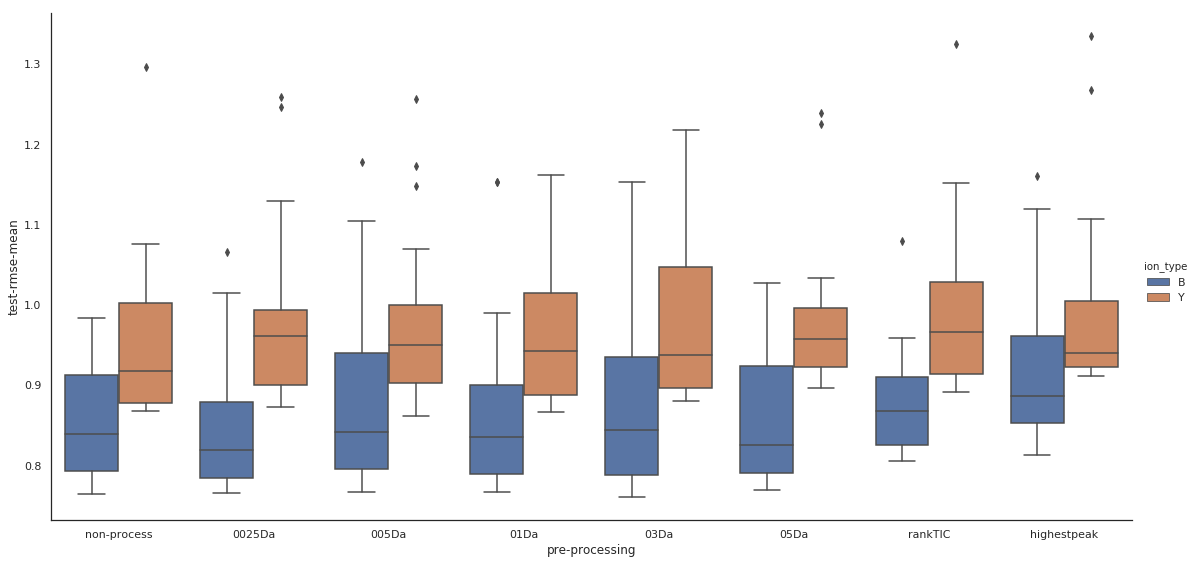

In [29]:
plt.figure(figsize = (140,100))
sns.set(style="white")
sns.catplot(x="pre-processing", y = "test-rmse-mean",hue="ion_type", kind = "box",data=hyperopt_results, height=8, aspect=2)
#fig = plt.figure(figsize = (1400,400))


In [30]:
def extract_best_results(file):
    df =  pd.read_csv(file)
    df_sorted = df.sort_values(by=['test-rmse-mean'], ascending=True)
    prepro = file.split("_")[-2]
    ion = file[-1]
    df_sorted["pre-processing"] = [prepro]*len(df)
    df_sorted["ion_type"] = [ion]*len(df)
    return pd.DataFrame(df_sorted.iloc[0]).T

In [31]:
df_list = []
for file in results_files_ordered:
    df_list.append(extract_best_results(file))
hyperopt_results = pd.concat(df_list)

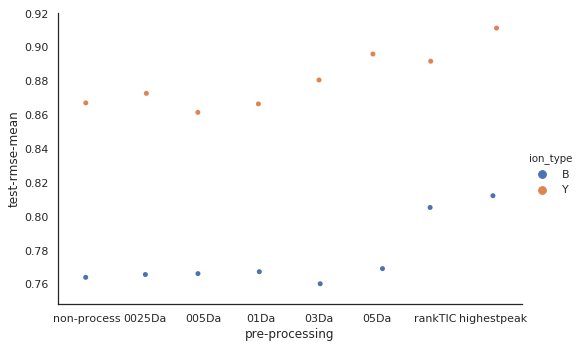

In [36]:
sns.catplot(x="pre-processing", y = "test-rmse-mean", hue="ion_type", data=hyperopt_results, height=5, aspect=1.5)